In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape: ",x_train.shape )

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train.shape:  (60000, 28, 28)


In [ ]:
# the data is only 2D !
# convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
# number of classes
K = len(set(y_train))
print("number of classes: ", K)

number of classes:  10


In [ ]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32,(3,3), strides=2, activation='relu')(i)
x = Conv2D(64,(3,3), strides=2, activation='relu')(x)
x = Conv2D(128,(3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512,  activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.7523 - loss: 0.6826 - val_accuracy: 0.8526 - val_loss: 0.3951
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8609 - loss: 0.3656 - val_accuracy: 0.8722 - val_loss: 0.3436
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8829 - loss: 0.3108 - val_accuracy: 0.8868 - val_loss: 0.3144
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8962 - loss: 0.2741 - val_accuracy: 0.8910 - val_loss: 0.2930
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9056 - loss: 0.2467 - val_accuracy: 0.8968 - val_loss: 0.2918
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9185 - loss: 0.2190 - val_accuracy: 0.9036 - val_loss: 0.2811
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9210 - loss: 0.2027 - val_accuracy: 0.8990 - val_loss: 0.2924
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9276 - loss: 0.18

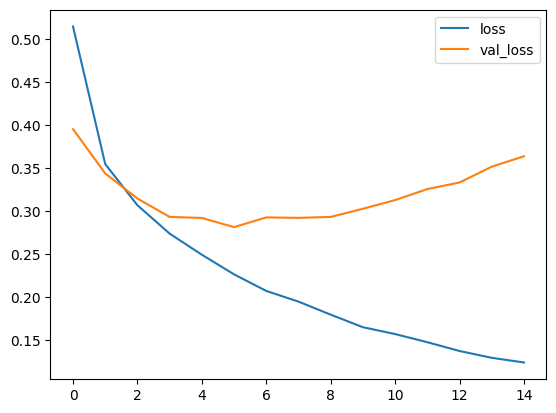

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

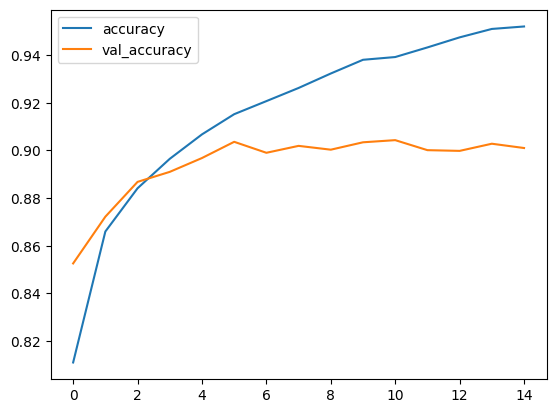

In [ ]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend();

In [ ]:
!pip install -U scikit-learn scipy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 104.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion matrix, without normalization
[[871   0  28  24   2   1  71   0   3   0]
 [  1 977   1  14   3   0   2   0   2   0]
 [ 15   0 888  11  33   0  51   0   2   0]
 [  8   3  15 918  21   0  35   0   0   0]
 [  1   1 105  33 771   0  89   0   0   0]
 [  0   0   0   2   0 968   0  17   0  13]
 [122   0  86  24  49   1 711   0   7   0]
 [  0   0   0   0   0   8   0 968   0  24]
 [  6   0   5   0   3   1   7   1 976   1]
 [  0   0   0   0   0   3   1  33   1 962]]


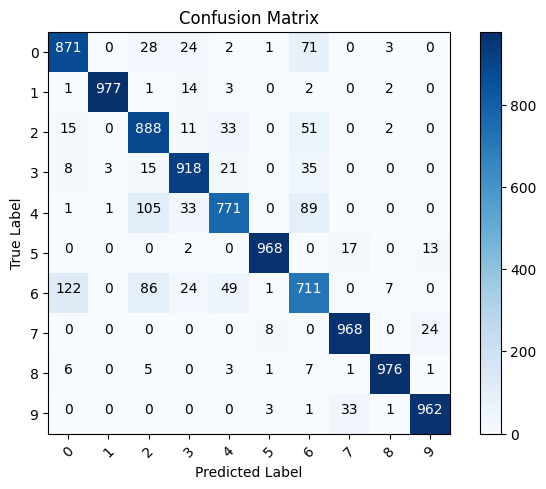

In [ ]:
# Plot the confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matric(cm, classes, normalize=False, title='Confusion Matrix',cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print('Confusion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks= np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt= '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matric(cm,list(range(10)))

In [ ]:
# Label mapping
labels = '''
T-shirt/top
Trousers
Dress
Coat
Sandal
Shirt
Sneakers
Bag
Ankle boot '''.split()

In [ ]:
labels

['T-shirt/top',
 'Trousers',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneakers',
 'Bag',
 'Ankle',
 'boot']

Text(0.5, 1.0, 'True label: Sneakers Predicted: Dress')

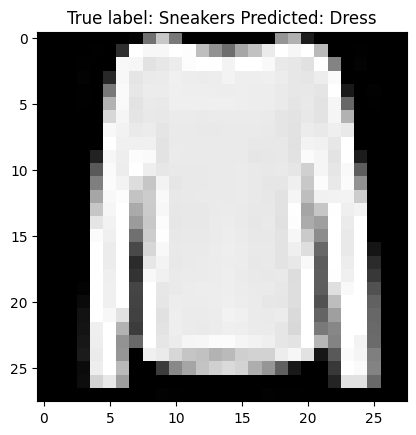

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title('True label: %s Predicted: %s' % (labels[y_test[i]], labels[p_test[i]]))